In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [4]:
df = pd.read_csv('/content/Superstore.csv', encoding='ISO-8859-1')

In [5]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

<ipython-input-7-0b0c75b4eb7b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


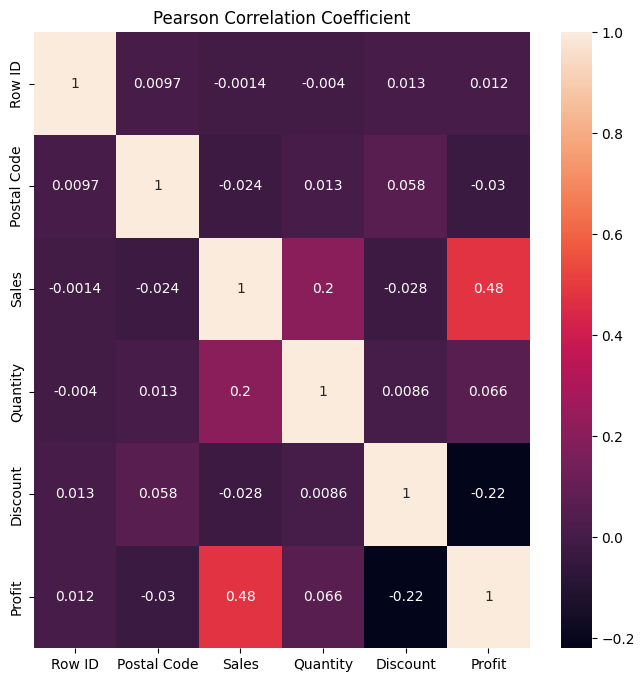

In [7]:
correlation_matrix = df.corr()

plt.figure(figsize=(8,8))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Pearson Correlation Coefficient')
plt.show()

In [8]:
df.dropna(inplace=True)

In [9]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   object        
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [10]:
df['Month'] = df['Order Date'].dt.month
df['Year'] = df['Order Date'].dt.year
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Month,Year
0,1,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,11,2016
1,2,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,11,2016
2,3,CA-2016-138688,2016-06-12,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,6,2016
3,4,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,10,2015
4,5,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,10,2015


In [11]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Month,Year
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896,7.809686,2015.722233
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108,3.284654,1.123555
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000,1.000000,2014.000000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750,5.000000,2015.000000
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500,9.000000,2016.000000
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000,11.000000,2017.000000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000,12.000000,2017.000000


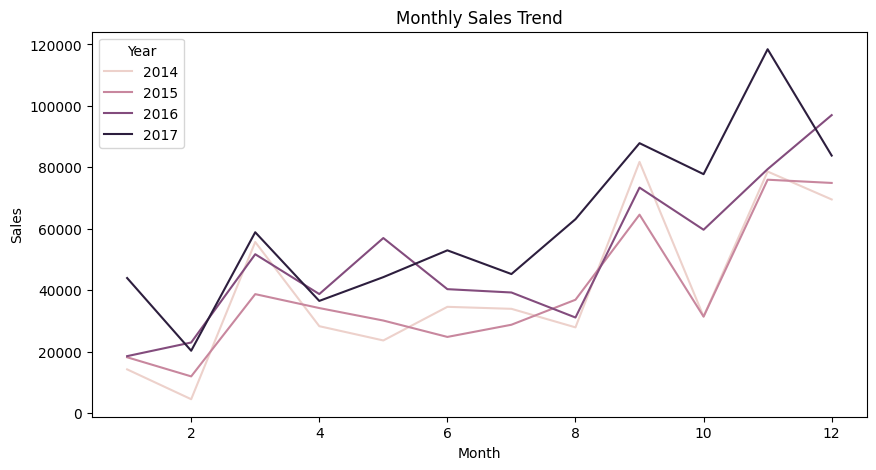

,Year,Month,Sales
0,2014,1,14236.8950
1,2014,2,4519.8920
2,2014,3,55691.0090
3,2014,4,28295.3450
4,2014,5,23648.2870
5,2014,6,34595.1276
6,2014,7,33946.3930
7,2014,8,27909.4685
8,2014,9,81777.3508
9,2014,10,31453.3930


In [13]:
monthly_sales = df.groupby(['Year', 'Month'])['Sales'].sum().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data=monthly_sales, x='Month', y='Sales', hue='Year')
plt.title('Monthly Sales Trend')
plt.show()

monthly_sales

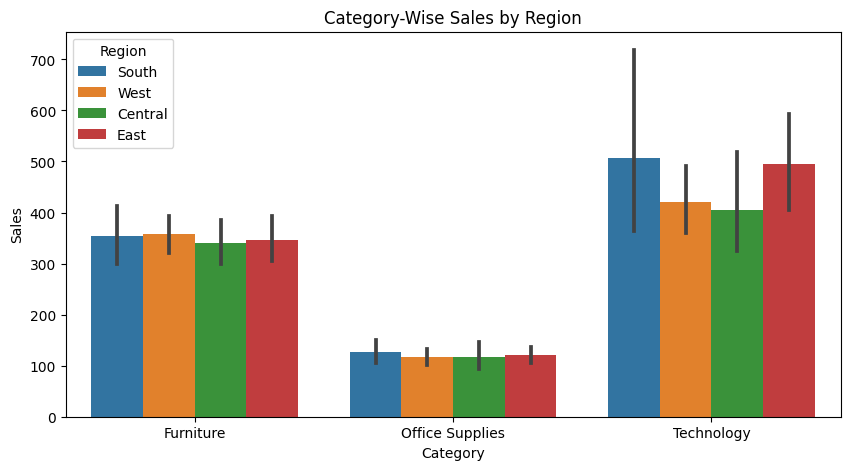

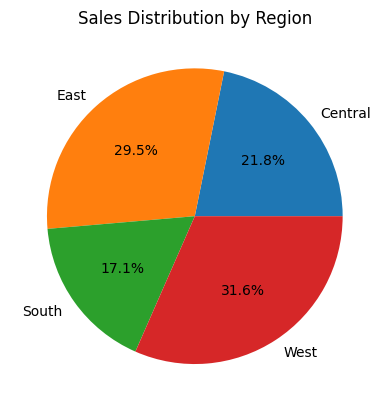

In [15]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, x='Category', y='Sales', hue='Region')
plt.title('Category-Wise Sales by Region')
plt.show()

region_sales = df.groupby('Region')['Sales'].sum()
plt.pie(region_sales, labels=region_sales.index, autopct='%1.1f%%')
plt.title('Sales Distribution by Region')
plt.show()

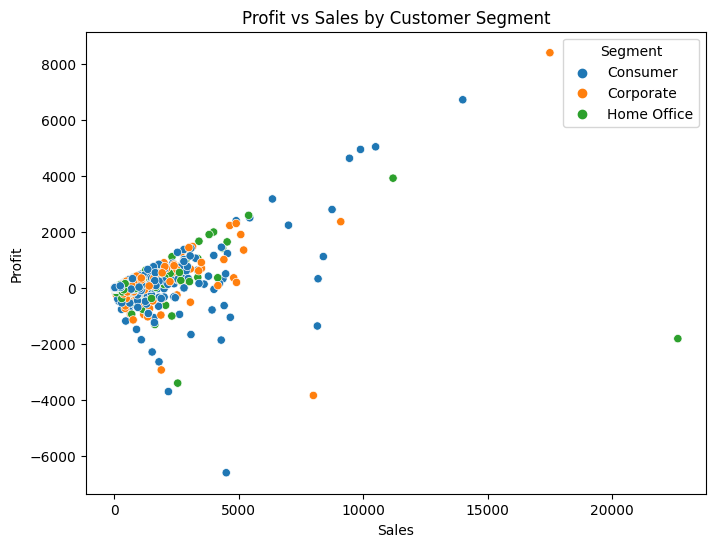

In [16]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Sales', y='Profit', hue='Segment')
plt.title('Profit vs Sales by Customer Segment')
plt.show()

In [17]:
region1='West'
region2='Central'

threshould = 0.05

In [19]:
region1_sales = df[df['Region'] == region1]['Sales']
region2_sales = df[df['Region'] == region2]['Sales']

t_stat, p_val = stats.ttest_ind(region1_sales, region2_sales)

print(f'p-value = {p_val}')

if p_val<threshould:
    print('reject null hypothesis, there is significant difference between 2 groups')
else:
    print('fail to reject null hypothesis, no significant difference between 2 groups')

p-value = 0.49219124958256355
fail to reject null hypothesis, no significant difference between 2 groups


In [20]:
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Month,Year
0,1,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,11,2016
1,2,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,11,2016
2,3,CA-2016-138688,2016-06-12,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,6,2016
3,4,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,10,2015
4,5,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,10,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028,1,2014
9990,9991,CA-2017-121258,2017-02-26,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332,2,2017
9991,9992,CA-2017-121258,2017-02-26,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932,2,2017
9992,9993,CA-2017-121258,2017-02-26,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200,2,2017


In [21]:
df.corr()

<ipython-input-21-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Month,Year
Row ID,1.000000,0.009671,-0.001359,-0.004016,0.013480,0.012497,-0.018732,0.015430
Postal Code,0.009671,1.000000,-0.023854,0.012761,0.058443,-0.029961,0.026234,0.004299
Sales,-0.001359,-0.023854,1.000000,0.200795,-0.028190,0.479064,-0.000625,-0.009679
Quantity,-0.004016,0.012761,0.200795,1.000000,0.008623,0.066253,0.023355,-0.005810
Discount,0.013480,0.058443,-0.028190,0.008623,1.000000,-0.219487,-0.004935,-0.002662
Profit,0.012497,-0.029961,0.479064,0.066253,-0.219487,1.000000,-0.000502,0.004670
Month,-0.018732,0.026234,-0.000625,0.023355,-0.004935,-0.000502,1.000000,-0.020183
Year,0.015430,0.004299,-0.009679,-0.005810,-0.002662,0.004670,-0.020183,1.000000


In [22]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Month,Year
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896,7.809686,2015.722233
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108,3.284654,1.123555
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000,1.000000,2014.000000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750,5.000000,2015.000000
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500,9.000000,2016.000000
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000,11.000000,2017.000000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000,12.000000,2017.000000


<Axes: xlabel='Discount', ylabel='Count'>

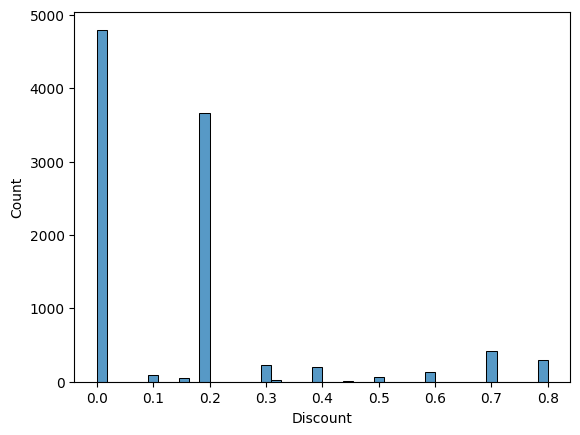

In [23]:
sns.histplot(data=df,x='Discount')